Exploratory Data Analysis

In [1]:
import pandas as pd

In [62]:
df = pd.read_csv('Nat Cat Events.csv')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91479 entries, 0 to 91478
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   url            91479 non-null  object
 1   url_mobile     25383 non-null  object
 2   title          91384 non-null  object
 3   seendate       91479 non-null  object
 4   socialimage    79390 non-null  object
 5   domain         91479 non-null  object
 6   language       91479 non-null  object
 7   sourcecountry  89958 non-null  object
dtypes: object(8)
memory usage: 5.6+ MB


ok , i'm just gonna share some insights , the table have 8 columns with 91479 rows , but there are some collumns that are missing values : 
    
    url_mobile , this one is missing alot of values (i'm just thinking out loud but i guess the column either will be dropped or it wont have an     effect on the rest of the project )

    title is missing some values (small number : 91384-91479=95 missing title)
    
    social image is missing some values (79390 - 91479 = 12089)
    
    finally the source country is missing 91479-89958=1521 rows 

In [64]:
df.head()

url  \
0  https://www.wpri.com/weather/severe-weather/20...   
1  https://volcanoes.usgs.gov/hans2/view/notice/D...   
2  https://www.ktbs.com/online_features/home_impr...   
3  https://www.ctvnews.ca/climate-and-environment...   
4  https://www.berkshireeagle.com/online_features...   

                                          url_mobile  \
0  https://www.wpri.com/weather/severe-weather/20...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                               title          seendate  \
0  2023 was a year of extreme weather in Southern...  20240101T223000Z   
1  HAWAIIAN VOLCANO OBSERVATORY DAILY UPDATE Mond...  20240101T220000Z   
2          How to Protect Your Family from Tornadoes  20240101T124500Z   
3  Iceland volcanoes bring tourists to island cou...  20240101T223000Z   
4          How to Protect Your Family from Tornadoes  20240101T090000Z   

                                         socialimage              domain  \
0  https://www.wpri.com/wp-content/uploads/sites/...            wpri.com   
1                                                NaN  volcanoes.usgs.gov   
2  https://bloximages.newyork1.vip.townnews.com/k...            ktbs.com   
3  https://www.ctvnews.ca/content/dam/ctvnews/en/...          ctvnews.ca   
4  https://bloximages.newyork1.vip.townnews.com/b...  berkshireeagle.com   

  language  sourcecountry  
0  English  United States  
1  English  United States  
2  English  United States  
3  English         Canada  
4  English  United States

In [65]:
df.describe()

url  \
count                                               91479   
unique                                              89303   
top     https://www.yahoo.com/news/forest-greene-mount...   
freq                                                    2   

                                               url_mobile  \
count                                               25383   
unique                                              24501   
top     https://www.aljazeera.com/amp/news/liveblog/20...   
freq                                                   23   

                                            title          seendate  \
count                                       91384             91479   
unique                                      65158             23354   
top     2 . 9 Magnitude Earthquake Reported In US  20240829T073000Z   
freq                                          212                71   

                                              socialimage     domain language  \
count                                               79390      91479    91479   
unique                                              63431       5878        1   
top     https://i.iheart.com/v3/re/new_assets/6653968c...  yahoo.com  English   
freq                                                  236       4691    91479   

        sourcecountry  
count           89958  
unique            135  
top     United States  
freq            59232

In [69]:
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"Column '{col}': {unique_count} unique values out of {len(df)} total rows ")

Column 'url': 89303 unique values out of 91479 total rows 
Column 'url_mobile': 24501 unique values out of 91479 total rows 
Column 'title': 65158 unique values out of 91479 total rows 
Column 'seendate': 23354 unique values out of 91479 total rows 
Column 'socialimage': 63431 unique values out of 91479 total rows 
Column 'domain': 5878 unique values out of 91479 total rows 
Column 'language': 1 unique values out of 91479 total rows 
Column 'sourcecountry': 135 unique values out of 91479 total rows 


Data Cleaning/ Removal of Noise

In [7]:
df["title"] = df["title"].apply(lambda x: str(x).lower())

In [8]:

df.drop_duplicates(subset=['title'], keep='first', inplace=True)
print(f"Number of articles after removing duplicate titles: {len(df)}")


Number of articles after removing duplicate titles: 64680


In [9]:
import re 

df['title'] = df['title'].str.strip() 
df['title'] = df['title'].str.replace(r'\s+', ' ', regex=True)  

df['title'] = df['title'].str.replace(r'[^\w\s]', '', regex=True)


In [9]:
df.head()

,url,url_mobile,title,seendate,socialimage,domain,language,sourcecountry
0,https://www.wpri.com/weather/severe-weather/20...,https://www.wpri.com/weather/severe-weather/20...,2023 was a year of extreme weather in southern...,20240101T223000Z,https://www.wpri.com/wp-content/uploads/sites/...,wpri.com,English,United States
1,https://volcanoes.usgs.gov/hans2/view/notice/D...,NaN,hawaiian volcano observatory daily update mond...,20240101T220000Z,NaN,volcanoes.usgs.gov,English,United States
2,https://www.ktbs.com/online_features/home_impr...,NaN,how to protect your family from tornadoes,20240101T124500Z,https://bloximages.newyork1.vip.townnews.com/k...,ktbs.com,English,United States
3,https://www.ctvnews.ca/climate-and-environment...,NaN,iceland volcanoes bring tourists to island cou...,20240101T223000Z,https://www.ctvnews.ca/content/dam/ctvnews/en/...,ctvnews.ca,English,Canada
5,https://news.yahoo.com/tornados-scorchers-ice-...,NaN,"tornados , scorchers and ice storm : top 10 we...",20240101T131500Z,https://s.yimg.com/ny/api/res/1.2/PXdWVXp40q9s...,news.yahoo.com,English,United States


i think some titles are in uppercase, some are in lower case, and some are in mixed case. I will convert all titles to lower case to ensure consistency.

In [15]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 8.3 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 13.2 MB/s eta 0:00:00


In [71]:
import nltk
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer


# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()


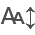

In [72]:
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

In [76]:

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to map POS tags to WordNet POS tags for lemmatization
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return 'a'  # Adjective
    elif treebank_tag.startswith('V'):
        return 'v'  # Verb
    elif treebank_tag.startswith('N'):
        return 'n'  # Noun
    elif treebank_tag.startswith('R'):
        return 'r'  # Adverb
    else:
        return 'n'  # Default to noun

# List of lemmatized natural catastrophe keywords
catastrophe_keywords = [
    # Earthquake related
    'earthquake', 'tremor', 'seismic', 'quake', 'aftershock', 'temblor',
    
    # Water related
    'flood', 'flooding', 'tsunami', 'tidal wave', 'storm surge', 'downpour', 'deluge',
    'hurricane', 'typhoon', 'cyclone', 'tropical storm', 'monsoon',
    
    # Wind related
    'tornado', 'twister', 'storm', 'gale', 'cyclone', 'windstorm', 'blizzard',
    'hurricane', 'typhoon',
    
    # Fire related
    'wildfire', 'fire', 'blaze', 'inferno', 'bushfire', 'conflagration',
    
    # Other disasters
    'volcano', 'eruption', 'volcanic', 'landslide', 'mudslide', 'avalanche',
    'drought', 'famine', 'heatwave', 'cold wave', 'freeze',
    'hail', 'lightning', 'thunderstorm'
]

# Expanded list of future indicators to exclude predictions or future events
future_indicators = [
    'will', 'going', 'predict', 'forecast', 'warn', 'expect', 'anticipate',
    'may', 'could', 'might', 'shall', 'would', 'future', 'upcoming', 'potential'
]

# List of negation words to exclude titles indicating no event
negation_words = ['no', 'not', 'never', 'none']

# Function to determine if a title is about a past catastrophe event
def is_past_catastrophe_event(title):
    # Tokenize the title
    tokens = word_tokenize(str(title).lower())
    
    # Get POS tags
    pos_tags = pos_tag(tokens)
    
    # Lemmatize tokens
    lemmatized_tokens = [
        lemmatizer.lemmatize(token, get_wordnet_pos(tag))
        for token, tag in pos_tags
    ]
    
    # Check if the title contains a catastrophe keyword
    if not any(token in catastrophe_keywords for token in lemmatized_tokens):
        return 0  # No catastrophe keyword
    
    # Check for negation words
    if any(token in negation_words for token in tokens):
        return 0  # Negated event (e.g., "no tsunami")
    
    # Check for future indicators
    if any(token in future_indicators for token in tokens):
        return 0  # Future or hypothetical event (e.g., "may hit")
    
    # Analyze verbs
    verbs = [(token, tag) for token, tag in pos_tags if tag.startswith('V')]
    if not verbs:
        # No verbs, assume it's an event if it has a catastrophe keyword
        return 1  # e.g., "Earthquake in Tokyo"
    
    # Check for past tense verbs
    if any(tag in ['VBD', 'VBN'] for _, tag in verbs):
        return 1  # Past tense (e.g., "flooded")
    
    # Check for present tense verbs without future indicators
    if any(tag in ['VBZ', 'VBP'] for _, tag in verbs):
        return 1  # Present tense event (e.g., "earthquake strikes")
    
    # Default to 0 if no clear event indication
    return 0


df['is_catastrophe_event'] = df.apply(lambda row: is_past_catastrophe_event(row['title']), axis=1)

print(f"\nNumber of articles containing catastrophe keywords (improved): {df['is_catastrophe_event'].sum()}")
print(f"Total number of articles: {len(df)}")



Number of articles containing catastrophe keywords (improved): 50844
Total number of articles: 91479


In [77]:
df[["title","is_catastrophe_event"]].head(80)

title  is_catastrophe_event
0   2023 was a year of extreme weather in Southern...                     0
1   HAWAIIAN VOLCANO OBSERVATORY DAILY UPDATE Mond...                     1
2           How to Protect Your Family from Tornadoes                     0
3   Iceland volcanoes bring tourists to island cou...                     1
4           How to Protect Your Family from Tornadoes                     0
..                                                ...                   ...
75  Massive earthquake slams Japan , residents fle...                     1
76  Indonesia , Floods and Landslides in Pasaman (...                     1
77  4 . 1 magnitude earthquake strikes Southern Ca...                     1
78  Warnings mount after quakes shake Türkiye sout...                     1
79  Massive earthquake strikes Japan , triggers ts...                     1

[80 rows x 2 columns]

In [73]:
!pip install spacy
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
    --------------------------------------- 0.3/12.2 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.2 MB 2.4 MB/s eta 0:00:05
   ----- ---------------------------------- 1.6/12.2 MB 2.6 MB/s eta 0:00:05
   ----- ---------------------------------- 1.6/12.2 MB 2.6 MB/s eta 0:00:05
   ----- ---------------------------------- 1.6/12.2 MB 2.6 MB/s eta 0:00:05
   ------ --------------------------------- 1.8/12.2 MB 1.5 MB/s eta 0:00:07
   ------ --------------------------------- 2.1/12.2 MB 1.5 MB/s eta 0:00:07
   -------- ------------------------------- 2

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.16 requires numpy<2,>=1.22.4; python_version < "3.12", but you have numpy 2.2.4 which is incompatible.
langchain-community 0.0.38 requires langchain-core<0.2.0,>=0.1.52, but you have langchain-core 0.3.51 which is incompatible.
langchain-community 0.0.38 requires langsmith<0.2.0,>=0.1.0, but you have langsmith 0.3.24 which is incompatible.
langchain-community 0.0.38 requires numpy<2,>=1, but you have numpy 2.2.4 which is incompatible.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 2.2.4 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     -- ------------------------------------- 0.8/12.8 MB 2.8 MB/s eta 0:00:05
     ---- ----------------------------------- 1.6/12.8 MB 2.9 MB/s eta 0:00:04
     ----- ---------------------------------- 1.8/12.8 MB 2.8 MB/s eta 0:00:04
     ------- -------------------------------- 2.4/12.8 MB 2.6 MB/s eta 0:00:05
     ------- -------------------------------- 2.4/12.8 MB 2.6 MB/s eta 0:00:05
     ------- -------------------------------- 2.4/12.8 MB 2.6 MB/s eta 0:00:05
     -------- ------------------------------- 2.6/12.8 MB 1.6 MB/s eta 0:00:07
     --------- ------------------------------ 3.1/12.8 MB 1.7 MB/s eta 0:00:06
     ------------ --------------------------- 3.9/12.8 MB 1.9 MB/s eta 0:00:05
     ------------- -------------------------- 4.2/12.8 MB 2.0 MB/s eta 0

In [82]:
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")

def contains_country_spacy(title):
    doc = nlp(str(title))
    for ent in doc.ents:
        if ent.label_ == "GPE": 
            return 1
    return 0

df['contains_country'] = df['title'].apply(contains_country_spacy)
print(f"\nNumber of articles containing country names: {df['contains_country'].sum()}")


Number of articles containing country names: 39885


In [ ]:
df.head()

url  \
0  https://www.wpri.com/weather/severe-weather/20...   
1  https://volcanoes.usgs.gov/hans2/view/notice/D...   
2  https://www.ktbs.com/online_features/home_impr...   
3  https://www.ctvnews.ca/climate-and-environment...   
5  https://news.yahoo.com/tornados-scorchers-ice-...   

                                          url_mobile  \
0  https://www.wpri.com/weather/severe-weather/20...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
5                                                NaN   

                                               title          seendate  \
0  2023 was a year of extreme weather in southern...  20240101T223000Z   
1  hawaiian volcano observatory daily update mond...  20240101T220000Z   
2          how to protect your family from tornadoes  20240101T124500Z   
3  iceland volcanoes bring tourists to island cou...  20240101T223000Z   
5  tornados , scorchers and ice storm : top 10 we...  20240101T131500Z   

                                         socialimage              domain  \
0  https://www.wpri.com/wp-content/uploads/sites/...            wpri.com   
1                                                NaN  volcanoes.usgs.gov   
2  https://bloximages.newyork1.vip.townnews.com/k...            ktbs.com   
3  https://www.ctvnews.ca/content/dam/ctvnews/en/...          ctvnews.ca   
5  https://s.yimg.com/ny/api/res/1.2/PXdWVXp40q9s...      news.yahoo.com   

  language  sourcecountry  is_catastrophe_event  contains_country  
0  English  United States                     0                 0  
1  English  United States                     1                 1  
2  English  United States                     0                 0  
3  English         Canada                     1                 0  
5  English  United States                     1                 1

In [20]:
df_clean = df[df['is_catastrophe_event'] == 1 ]
df_clean = df_clean[df_clean['contains_country'] == 1]

# df_clean = df_clean.drop(columns=['contains_country'])
# df_clean = df_clean.drop(columns=['is_catastrophe_event'])

df_clean["title"].head(50)
# df_clean.shape

1      hawaiian volcano observatory daily update mond...
5      tornados , scorchers and ice storm : top 10 we...
13     japan earthquakes : coastal residents told to ...
17     dswd dromic report on the tornado incident in ...
20     new state report : wildfire smoke increased de...
44     2023 finishes as 3rd warmest in central indian...
47       widely wet  start to new year expected with ...
56     in photos : japan hit by massive earthquake on...
57     almost 100 , 000 ordered to leave area after j...
59                        map : earthquake strikes japan
62     massive earthquake slams japan , residents fle...
65     factbox - major earthquakes in japan since kob...
70     massive earthquake hits japan , horrifying vis...
73     japan earthquake live : tsunami warnings issue...
76     indonesia , floods and landslides in pasaman (...
77     4 . 1 magnitude earthquake strikes southern ca...
79     massive earthquake strikes japan , triggers ts...
82     live : first tsunami waves follow 7 . 5 quake ...
83     japan issues tsunami warning after 7 . 4 magni...
87     powerful earthquake slams japan , residents fl...
88     magnitude 7 . 6 earthquake strikes japan , tsu...
90     dmw activates helpline for filipinos affected ...
91     strong earthquakes cause chaos in western japa...
92        strong earthquakes rattle western japan photos
93           earthquake of 7 . 6 magnitude strikes japan
95     watch : first tsunami waves hit japan after ma...
96     7 . 4 - magnitude quake hits waters off japan ...
97       major tsunami warning : japan evacuates coas...
98     weather tracker : saudi arabia hit by floods a...
99     new year day earthquake hits los angeles in ca...
100    japan issues tsunami warnings , orders evacuat...
102    powerful quake rocks japan , nearly 100 , 000 ...
103    japan issues tsunami alert after series of str...
104    japan earthquake : indian embassy sets up emer...
106    tsunami warning issued after earthquake of mag...
108    four dead and dozens trapped as huge earthquak...
109    multiple deaths reported following powerful ea...
113    japan issues tsunami warnings after a series o...
114                 moment quake hits japan coastal town
117    japan hit by 7 . 4 - magnitude earthquake , ma...
119    magnitude 4 . 1 earthquake shakes long beach area
121    watch moment powerful earthquake hits japan as...
123    japan struck by powerful earthquake , triggeri...
126    massive earthquake jolts japan , residents rus...
128       japan orders evacuations after tsunami warning
129    magnitude 7 . 4 earthquake strikes japan , tsu...
132    rude awakening : 4 . 1 - magnitude earthquake ...
133    japan earthquake : tsunami warning issued afte...
134    mag 7 . 4 earthquake strikes japan , small tsu...
135    two new oregon laws require insurers to be mor...
Name: title, dtype: object

Categorization of Nat-Cat Titles

for this one i have some ideas : 
    1. the simplest is just keyword matching : 
                            having a list of the common catastrophes and all , we can use lemmatization and look for some words in these titles and classify based on that (i think the limitations i will face are the rules , the precision and the case where 2 catastrophes are mentioned in the same title)
    2. the second method is mainly a semantic search algorithm :
                            having the title , we just embed it and calculate it's cosine similarity to all the classes , and the one with the lowest score will be the most appropriate ( the model will have just one response , highly depends on the embedding model and it's not so transparent)
    3. the third method is simply training an unsupervised model and interpret the results

keyword matching 

In [ ]:
category_keywords = {
    'Earthquake': [
        lemmatizer.lemmatize('earthquake', 'n'),
        lemmatizer.lemmatize('tremor', 'n'),
        lemmatizer.lemmatize('seismic', 'a'),
        lemmatizer.lemmatize('magnitude', 'n'),
        lemmatizer.lemmatize('richter', 'n'),
        lemmatizer.lemmatize('quake', 'n'),
        lemmatizer.lemmatize('temblor', 'n'),
        lemmatizer.lemmatize('aftershock', 'n'),
        lemmatizer.lemmatize('groundshake', 'n')
    ],
    'Floods': [
        lemmatizer.lemmatize('flood', 'n'),
        lemmatizer.lemmatize('flooding', 'n'),
        lemmatizer.lemmatize('inundation', 'n'),
        lemmatizer.lemmatize('overflow', 'n'),
        lemmatizer.lemmatize('river', 'n'),
        lemmatizer.lemmatize('creek', 'n'),
        lemmatizer.lemmatize('dam', 'n'),
        lemmatizer.lemmatize('levee', 'n'),
        lemmatizer.lemmatize('rain', 'n'),
        lemmatizer.lemmatize('submerge', 'v'),
        lemmatizer.lemmatize('water', 'n')
    ],
    'Volcano': [
        lemmatizer.lemmatize('volcano', 'n'),
        lemmatizer.lemmatize('eruption', 'n'),
        lemmatizer.lemmatize('lava', 'n'),
        lemmatizer.lemmatize('ash', 'n'),
        lemmatizer.lemmatize('magma', 'n'),
        lemmatizer.lemmatize('crater', 'n'),
        lemmatizer.lemmatize('volcanic', 'a'),
        lemmatizer.lemmatize('tephra', 'n'),
        lemmatizer.lemmatize('smoke', 'n')
    ],
    'Tornado': [
        lemmatizer.lemmatize('tornado', 'n'),
        lemmatizer.lemmatize('twister', 'n'),
        lemmatizer.lemmatize('whirlwind', 'n'),
        lemmatizer.lemmatize('funnel', 'n'), 
        lemmatizer.lemmatize('cyclone', 'n'),
        lemmatizer.lemmatize('storm', 'n'),
        lemmatizer.lemmatize('hail', 'n')
    ],
    'Wildfire': [
        lemmatizer.lemmatize('wildfire', 'n'),
        lemmatizer.lemmatize('fire', 'n'),
        lemmatizer.lemmatize('forest', 'n'),
        lemmatizer.lemmatize('brush', 'n'), 
        lemmatizer.lemmatize('bushfire', 'n'),
        lemmatizer.lemmatize('flame', 'n'),
        lemmatizer.lemmatize('smoke', 'n'), 
        lemmatizer.lemmatize('burn', 'v'),
        lemmatizer.lemmatize('blaze', 'n')
    ]
}

In [23]:
def lemmatize_title(title):
    tokens = word_tokenize(title)
    pos_tags = pos_tag(tokens)
    lemmatized_tokens = [lemmatizer.lemmatize(token.lower(), get_wordnet_pos(tag[0].lower()))
                         for token, tag in pos_tags if tag[0].lower() in ['j', 'n', 'v', 'r']]
    return lemmatized_tokens

def categorize_title(title):
    lemmatized_tokens = lemmatize_title(title)
    categories = []
    for category, keywords in category_keywords.items():
        for keyword in keywords:
            if keyword in lemmatized_tokens:
                categories.append(category)
                break  
    return list(set(categories)) 


df_clean['predicted_category'] = df_clean['title'].apply(categorize_title)

print(df_clean[['title',  'predicted_category']].head(20))

# Let's see the counts of each predicted category
from collections import Counter
category_counts = Counter(cat for cats in df_clean['predicted_category'] for cat in cats)
print("\nCounts of predicted categories:")
print(category_counts)

                                                title   predicted_category
1   hawaiian volcano observatory daily update mond...            [Volcano]
5   tornados , scorchers and ice storm : top 10 we...            [Tornado]
13  japan earthquakes : coastal residents told to ...         [Earthquake]
17  dswd dromic report on the tornado incident in ...            [Tornado]
20  new state report : wildfire smoke increased de...  [Wildfire, Volcano]
44  2023 finishes as 3rd warmest in central indian...            [Tornado]
47    widely wet  start to new year expected with ...             [Floods]
56  in photos : japan hit by massive earthquake on...         [Earthquake]
57  almost 100 , 000 ordered to leave area after j...         [Earthquake]
59                     map : earthquake strikes japan         [Earthquake]
62  massive earthquake slams japan , residents fle...         [Earthquake]
65  factbox - major earthquakes in japan since kob...         [Earthquake]
70  massive earthquake hi

In [24]:
df_clean[['title',  'predicted_category']].sample(frac=1).head(20)

title predicted_category
77973  wind - driven wildfire forces evacuations in l...         [Wildfire]
41328      flood watch extends in miami - dade , broward           [Floods]
49030  3 . 4 magnitude earthquake reported in dekalb ...       [Earthquake]
71275  hurricane milton : hurricane milton triggers e...          [Tornado]
24111  iowa weather : high winds expected with powerf...          [Tornado]
77891  channel league cross country finals postponed ...         [Wildfire]
57412  storms in state down trees , cause power outag...          [Tornado]
69184  japan , philippines issue warnings over increa...          [Volcano]
15382  flood alert in force for lower river stour in ...           [Floods]
87857         uk seismologist explains monday earthquake       [Earthquake]
43852          california faces early surge in wildfires         [Wildfire]
88342  north dakota crude output cut by 520 , 000 b /...         [Wildfire]
63283  should we be concerned ? a brief history of co...          [Volcano]
383    six killed in 7 . 5 magnitude earthquake in japan       [Earthquake]
68514  kentucky airmen deploy for post - hurricane re...                 []
47741  whakaari / white island : volcano owners wish ...          [Volcano]
230    7 . 5 magnitude earthquake strikes japan ; tsu...       [Earthquake]
41931  light earthquake , 4 . 8 mag has occurred near...       [Earthquake]
78423  light earthquake , 4 . 7 mag was detected near...       [Earthquake]
84805  7 . 0 magnitude earthquake reported in us | ne...       [Earthquake]

now we will test the embedding models 

after a small search on the techniques in the embedding , i found out that there is either the cosine similarity project as discussed earlier or the reranker wich simply computes the relevance score between document and a search query 

In [25]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [27]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load a pre-trained sentence transformer model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2') # A good balance of speed and accuracy
print(111111111111)
# Define example texts for each category
category_examples = {
    'Earthquake': 'A strong earthquake struck the region, causing significant damage.',
    'Floods': 'Heavy rainfall led to widespread flooding and evacuations.',
    'Volcano': 'The volcano erupted, spewing ash and lava into the sky.',
    'Tornado': 'A powerful tornado touched down, destroying homes and businesses.',
    'Wildfire': 'A large wildfire spread rapidly through the forest, burning thousands of acres.'
}

# Get embeddings for the category examples
category_embeddings = {cat: model.encode(text) for cat, text in category_examples.items()}

def semantic_categorize_title(title):
    title_embedding = model.encode(title)
    similarities = {}
    for category, embedding in category_embeddings.items():
        similarity = cosine_similarity(title_embedding.reshape(1, -1), embedding.reshape(1, -1))[0][0]
        similarities[category] = similarity

    best_category = None
    max_similarity = -1
    threshold = 0.6 # You might need to tune this threshold

    for category, similarity in similarities.items():
        if similarity > max_similarity and similarity >= threshold:
            max_similarity = similarity
            best_category = category

    return best_category

# Apply semantic categorization to the filtered DataFrame
df_clean['semantic_category'] = df_clean['title'].apply(semantic_categorize_title)

print(df_clean[['title', 'predicted_category', 'semantic_category']].head(20))

# Let's see the counts of each semantic category
semantic_category_counts = Counter(df_clean['semantic_category'].dropna())
print("\nCounts of semantic categories:")
print(semantic_category_counts)

                                                title   predicted_category  \
1   hawaiian volcano observatory daily update mond...            [Volcano]   
5   tornados , scorchers and ice storm : top 10 we...            [Tornado]   
13  japan earthquakes : coastal residents told to ...         [Earthquake]   
17  dswd dromic report on the tornado incident in ...            [Tornado]   
20  new state report : wildfire smoke increased de...  [Wildfire, Volcano]   
44  2023 finishes as 3rd warmest in central indian...            [Tornado]   
47    widely wet  start to new year expected with ...             [Floods]   
56  in photos : japan hit by massive earthquake on...         [Earthquake]   
57  almost 100 , 000 ordered to leave area after j...         [Earthquake]   
59                     map : earthquake strikes japan         [Earthquake]   
62  massive earthquake slams japan , residents fle...         [Earthquake]   
65  factbox - major earthquakes in japan since kob...         [E

In [30]:
!pip install sentence-transformers scikit-learn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from collections import Counter
from tqdm import tqdm
import pandas as pd


model_name = "intfloat/e5-large"
model = SentenceTransformer(model_name)

category_labels = [
    "earthquake",
    "floods",
    "volcano",
    "tornado",
    "wildfire"
]


category_embeddings = {label: model.encode(label) for label in category_labels}

def semantic_categorize_title_hf_no_threshold(title):
    title_embedding = model.encode(title)
    similarities = {}
    for category, embedding in category_embeddings.items():
        similarity = cosine_similarity(title_embedding.reshape(1, -1), embedding.reshape(1, -1))[0][0]
        similarities[category] = similarity

    best_category = max(similarities, key=similarities.get)
    return best_category


tqdm.pandas(desc="Semantic Categorization")
df_clean['semantic_category_no_threshold'] = df_clean['title'].progress_apply(semantic_categorize_title_hf_no_threshold)

print(df_clean[['title',  'predicted_category', 'semantic_category_no_threshold']].head(20))


semantic_category_counts_no_threshold = Counter(df_clean['semantic_category_no_threshold'])
print("\nCounts of semantic categories (Hugging Face - {} - No Threshold):".format(model_name))
print(semantic_category_counts_no_threshold)

Semantic Categorization: 100%|██████████| 13527/13527 [21:13<00:00, 10.62it/s]

                                                title   predicted_category  \
1   hawaiian volcano observatory daily update mond...            [Volcano]   
5   tornados , scorchers and ice storm : top 10 we...            [Tornado]   
13  japan earthquakes : coastal residents told to ...         [Earthquake]   
17  dswd dromic report on the tornado incident in ...            [Tornado]   
20  new state report : wildfire smoke increased de...  [Wildfire, Volcano]   
44  2023 finishes as 3rd warmest in central indian...            [Tornado]   
47    widely wet  start to new year expected with ...             [Floods]   
56  in photos : japan hit by massive earthquake on...         [Earthquake]   
57  almost 100 , 000 ordered to leave area after j...         [Earthquake]   
59                     map : earthquake strikes japan         [Earthquake]   
62  massive earthquake slams japan , residents fle...         [Earthquake]   
65  factbox - major earthquakes in japan since kob...         [E

In [36]:
df_clean[['title',  'predicted_category', 'semantic_category_no_threshold']].head(20)

title   predicted_category  \
1   hawaiian volcano observatory daily update mond...            [Volcano]   
5   tornados , scorchers and ice storm : top 10 we...            [Tornado]   
13  japan earthquakes : coastal residents told to ...         [Earthquake]   
17  dswd dromic report on the tornado incident in ...            [Tornado]   
20  new state report : wildfire smoke increased de...  [Wildfire, Volcano]   
44  2023 finishes as 3rd warmest in central indian...            [Tornado]   
47    widely wet  start to new year expected with ...             [Floods]   
56  in photos : japan hit by massive earthquake on...         [Earthquake]   
57  almost 100 , 000 ordered to leave area after j...         [Earthquake]   
59                     map : earthquake strikes japan         [Earthquake]   
62  massive earthquake slams japan , residents fle...         [Earthquake]   
65  factbox - major earthquakes in japan since kob...         [Earthquake]   
70  massive earthquake hits japan , horrifying vis...         [Earthquake]   
73  japan earthquake live : tsunami warnings issue...         [Earthquake]   
76  indonesia , floods and landslides in pasaman (...             [Floods]   
77  4 . 1 magnitude earthquake strikes southern ca...         [Earthquake]   
79  massive earthquake strikes japan , triggers ts...         [Earthquake]   
82  live : first tsunami waves follow 7 . 5 quake ...         [Earthquake]   
83  japan issues tsunami warning after 7 . 4 magni...         [Earthquake]   
87  powerful earthquake slams japan , residents fl...         [Earthquake]   

   semantic_category_no_threshold  
1                         volcano  
5                         tornado  
13                     earthquake  
17                        tornado  
20                       wildfire  
44                        tornado  
47                         floods  
56                     earthquake  
57                     earthquake  
59                     earthquake  
62                     earthquake  
65                     earthquake  
70                     earthquake  
73                     earthquake  
76                         floods  
77                     earthquake  
79                     earthquake  
82                     earthquake  
83                     earthquake  
87                     earthquake

In [ ]:
from sentence_transformers import CrossEncoder
from tqdm import tqdm
import pandas as pd

# Load the pretrained CrossEncoder model
model = CrossEncoder("cross-encoder/ms-marco-MiniLM-L-6-v2")

# Define the list of category labels
category_labels = [
    "earthquake",
    "floods",
    "volcano",
    "tornado",
    "wildfire"
]

def rerank_categorize_title(title):
    # Create pairs of (title, category_label)
    pairs = [(title, label) for label in category_labels]

    # Predict the scores for each pair
    scores = model.predict(pairs)

    # Get the index of the category with the highest score
    best_category_index = scores.argmax()

    # Return the corresponding category label
    return category_labels[best_category_index]

# Apply the reranking categorization to the filtered DataFrame with tqdm
tqdm.pandas(desc="Reranking Categorization")
df_clean['reranked_category'] = df_clean['title'].progress_apply(rerank_categorize_title)


c:\Users\mbouchoucha\Desktop\lang\.venv\lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\mbouchoucha\.cache\huggingface\hub\models--cross-encoder--ms-marco-MiniLM-L-6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Reranking Categorization: 100%|██████████| 13527/13527 [02:45<00:00, 81.88it/s]


AttributeError: 'CrossEncoder' object has no attribute 'name'

In [ ]:
reranked_category_counts = df_clean['reranked_category'].value_counts()
print(reranked_category_counts)

reranked_category
earthquake    4722
tornado       3539
wildfire      2510
floods        2194
volcano        562
Name: count, dtype: int64


In [41]:
df_clean[['title', 'predicted_category', 'semantic_category_no_threshold', 'reranked_category']].head(20)

title   predicted_category  \
1   hawaiian volcano observatory daily update mond...            [Volcano]   
5   tornados , scorchers and ice storm : top 10 we...            [Tornado]   
13  japan earthquakes : coastal residents told to ...         [Earthquake]   
17  dswd dromic report on the tornado incident in ...            [Tornado]   
20  new state report : wildfire smoke increased de...  [Wildfire, Volcano]   
44  2023 finishes as 3rd warmest in central indian...            [Tornado]   
47    widely wet  start to new year expected with ...             [Floods]   
56  in photos : japan hit by massive earthquake on...         [Earthquake]   
57  almost 100 , 000 ordered to leave area after j...         [Earthquake]   
59                     map : earthquake strikes japan         [Earthquake]   
62  massive earthquake slams japan , residents fle...         [Earthquake]   
65  factbox - major earthquakes in japan since kob...         [Earthquake]   
70  massive earthquake hits japan , horrifying vis...         [Earthquake]   
73  japan earthquake live : tsunami warnings issue...         [Earthquake]   
76  indonesia , floods and landslides in pasaman (...             [Floods]   
77  4 . 1 magnitude earthquake strikes southern ca...         [Earthquake]   
79  massive earthquake strikes japan , triggers ts...         [Earthquake]   
82  live : first tsunami waves follow 7 . 5 quake ...         [Earthquake]   
83  japan issues tsunami warning after 7 . 4 magni...         [Earthquake]   
87  powerful earthquake slams japan , residents fl...         [Earthquake]   

   semantic_category_no_threshold reranked_category  
1                         volcano           volcano  
5                         tornado           tornado  
13                     earthquake        earthquake  
17                        tornado           tornado  
20                       wildfire          wildfire  
44                        tornado           tornado  
47                         floods            floods  
56                     earthquake        earthquake  
57                     earthquake        earthquake  
59                     earthquake        earthquake  
62                     earthquake        earthquake  
65                     earthquake        earthquake  
70                     earthquake        earthquake  
73                     earthquake        earthquake  
76                         floods            floods  
77                     earthquake        earthquake  
79                     earthquake        earthquake  
82                     earthquake        earthquake  
83                     earthquake        earthquake  
87                     earthquake        earthquake

c:\Users\mbouchoucha\Desktop\lang\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


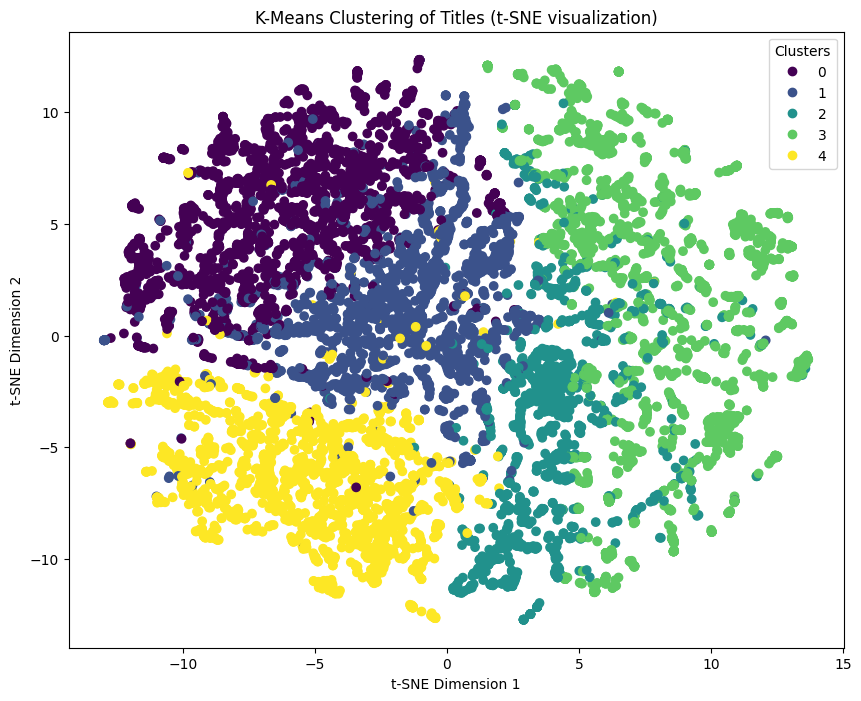


Examples from each K-Means cluster:

Cluster 0:
- tornados , scorchers and ice storm : top 10 weather events in abilene and san angelo areas
- dswd dromic report on the tornado incident in brgy . rizal , anao , tarlac , 30 december 2023 , 6pm - philippines
- 2023 finishes as 3rd warmest in central indiana , most tornadoes statewide since 2011
- myrtle beach area neighborhood finds support after tornado | myrtle beach news
- storm henk : is there a tornado warning in the united kingdom ? 
- storm henk : is there a tornado warning in the united kingdom ? | the westmorland gazette
- the unforgettable 1924 thurman tornado : colorado historic tragedy
- southeast united states weather : risk of heavy rains , tornadoes expected due to storm
- tornado leaves destruction , job losses , and hendersonville in need
- kansas sees lower tornado count , one tornado watch issued for central region in 2023

Cluster 1:
-   widely wet  start to new year expected with flood warnings across united kingdom

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the sentence transformer model
model = SentenceTransformer("intfloat/e5-large")

# Get embeddings for the titles
title_embeddings = model.encode(df_clean['title'].tolist())

# Apply K-Means clustering
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(title_embeddings)

# Add cluster labels to the DataFrame
df_clean['kmeans_cluster'] = clusters

# Visualize clusters using t-SNE (optional, for qualitative understanding)
tsne = TSNE(n_components=2, random_state=42, n_iter=300, perplexity=10)
reduced_embeddings = tsne.fit_transform(title_embeddings)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering of Titles (t-SNE visualization)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

# Print some examples from each cluster
print("\nExamples from each K-Means cluster:")
for i in range(n_clusters):
    print(f"\nCluster {i}:")
    cluster_titles = df_clean[df_clean['kmeans_cluster'] == i]['title'].head(10).tolist()
    for title in cluster_titles:
        print(f"- {title}")


In [43]:
cluster_label_mapping = {
    0: "tornado", 
    1: "floods",
    2: "volcano",
    3: "earthquake",
    4: "wildfire"
}

df_clean['kmeans_predicted_label'] = df_clean['kmeans_cluster'].map(cluster_label_mapping)

In [ ]:

print("\nDataFrame with K-Means cluster and potential labels:")
print(df_clean[['title', 'kmeans_cluster', 'kmeans_predicted_label']].head(20))

print("\nCounts of titles per K-Means predicted label:")
df_clean['kmeans_predicted_label'].value_counts()


DataFrame with K-Means cluster and potential labels:
                                                title  kmeans_cluster  \
1   hawaiian volcano observatory daily update mond...               2   
5   tornados , scorchers and ice storm : top 10 we...               0   
13  japan earthquakes : coastal residents told to ...               2   
17  dswd dromic report on the tornado incident in ...               0   
20  new state report : wildfire smoke increased de...               4   
44  2023 finishes as 3rd warmest in central indian...               0   
47    widely wet  start to new year expected with ...               1   
56  in photos : japan hit by massive earthquake on...               2   
57  almost 100 , 000 ordered to leave area after j...               2   
59                     map : earthquake strikes japan               2   
62  massive earthquake slams japan , residents fle...               2   
65  factbox - major earthquakes in japan since kob...               2 

In [46]:
df_clean[['title', 'predicted_category', 'semantic_category_no_threshold', 'reranked_category' , 'kmeans_predicted_label']].sample(frac=1).head(20)

title  \
38885  flash flood warning issued for montgomery coun...   
19271  b . c . officials to give drought update as pr...   
72649  humboldt county joins international shakeout d...   
64506  minor earthquake , 3 . 29999995 mag has occurr...   
81502     earthquake of magnitude 4 . 4 hits afghanistan   
69402  light earthquake , 4 . 5 mag was detected near...   
3049   5 . 9 magnitude earthquake reported in us | ne...   
18065  southwest wildfire awareness week : time for a...   
17534  firefighters make significant progress heading...   
5799   quake info : strong mag . 5 . 2 earthquake - q...   
25733  morocco earthquake killed thousands . but surv...   
88253  wind - whipped soto fire threatens homes in so...   
82503  earthquake in ahar city in iran : tremors were...   
1154   rishi sunak accused of being  asleep at the wh...   
31856  tornado warnings issued for several oklahoma c...   
44089  4 . 1 magnitude earthquake reported in us stat...   
85118  what to know about northern california rare ts...   
34311                      canada wildfire season begins   
56597  4 . 3 magnitude earthquake reported in us | ne...   
10109  possible tornado spotted in saline county | th...   

          predicted_category semantic_category_no_threshold reranked_category  \
38885               [Floods]                         floods            floods   
19271             [Wildfire]                       wildfire          wildfire   
72649           [Earthquake]                     earthquake        earthquake   
64506  [Volcano, Earthquake]                     earthquake        earthquake   
81502           [Earthquake]                     earthquake        earthquake   
69402           [Earthquake]                     earthquake        earthquake   
3049            [Earthquake]                     earthquake        earthquake   
18065             [Wildfire]                       wildfire          wildfire   
17534             [Wildfire]                       wildfire          wildfire   
5799            [Earthquake]                     earthquake        earthquake   
25733           [Earthquake]                     earthquake        earthquake   
88253             [Wildfire]                       wildfire           tornado   
82503           [Earthquake]                     earthquake        earthquake   
1154                [Floods]                         floods            floods   
31856              [Tornado]                        tornado           tornado   
44089           [Earthquake]                     earthquake        earthquake   
85118                     []                     earthquake            floods   
34311             [Wildfire]                       wildfire          wildfire   
56597           [Earthquake]                     earthquake        earthquake   
10109              [Tornado]                        tornado           tornado   

      kmeans_predicted_label  
38885                 floods  
19271               wildfire  
72649                volcano  
64506             earthquake  
81502             earthquake  
69402             earthquake  
3049              earthquake  
18065               wildfire  
17534               wildfire  
5799              earthquake  
25733                volcano  
88253               wildfire  
82503             earthquake  
1154                  floods  
31856                tornado  
44089             earthquake  
85118                volcano  
34311               wildfire  
56597             earthquake  
10109                tornado

c:\Users\mbouchoucha\Desktop\lang\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


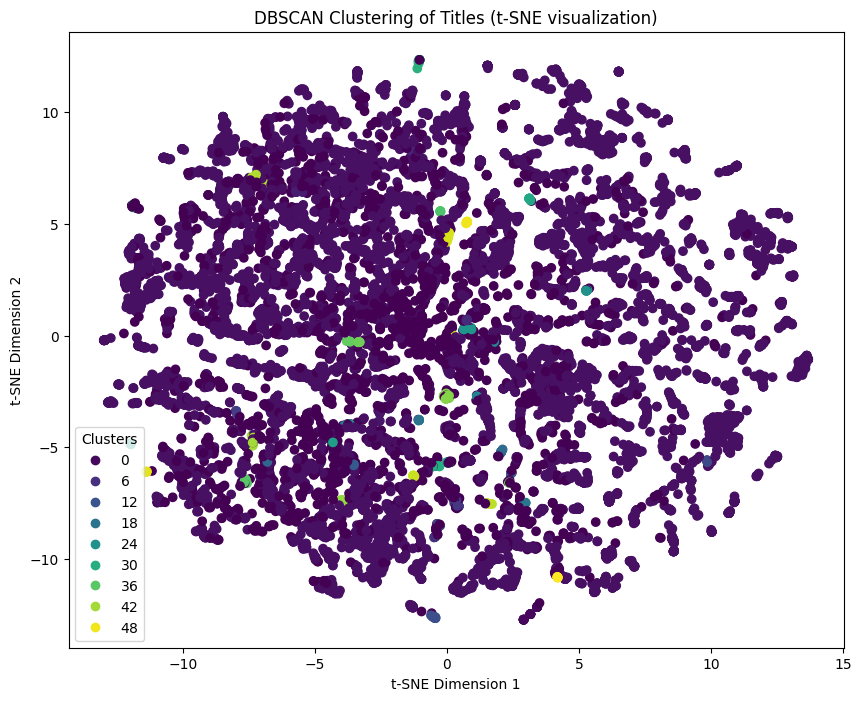


Number of clusters found by DBSCAN: 51 (including noise)

Examples from each DBSCAN cluster (excluding noise):

Cluster 0:
- hawaiian volcano observatory daily update monday , january 1 , 2024 , 19 : 00 utc | usgs hazard notification system ( hans ) for volcanoes
- hawaiian volcano observatory daily update wednesday , january 3 , 2024 , 18 : 00 utc | usgs hazard notification system ( hans ) for volcanoes
- alaska volcano observatory daily update wednesday , january 3 , 2024 , 20 : 34 utc | usgs hazard notification system ( hans ) for volcanoes
- alaska volcano observatory daily update thursday , january 4 , 2024 , 21 : 38 utc | usgs hazard notification system ( hans ) for volcanoes
- alaska volcano observatory weekly update friday , january 5 , 2024 , 21 : 52 utc | usgs hazard notification system ( hans ) for volcanoes
- alaska volcano observatory daily update sunday , january 7 , 2024 , 19 : 10 utc | usgs hazard notification system ( hans ) for volcanoes
- hawaiian volcano observator

In [51]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the sentence transformer model
model = SentenceTransformer("intfloat/e5-large")

# Get embeddings for the titles
title_embeddings = model.encode(df_clean['title'].tolist())

dbscan = DBSCAN(eps=0.5, min_samples=5)
db_clusters = dbscan.fit_predict(title_embeddings)

# Add DBSCAN cluster labels to the DataFrame
df_clean['dbscan_cluster'] = db_clusters

# Visualize clusters using t-SNE
tsne = TSNE(n_components=2, random_state=42, n_iter=300, perplexity=10)
reduced_embeddings_dbscan = tsne.fit_transform(title_embeddings)

plt.figure(figsize=(10, 8))
scatter_dbscan = plt.scatter(reduced_embeddings_dbscan[:, 0], reduced_embeddings_dbscan[:, 1], c=db_clusters, cmap='viridis')
plt.title('DBSCAN Clustering of Titles (t-SNE visualization)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(*scatter_dbscan.legend_elements(), title='Clusters')
plt.show()

# Print the number of unique clusters found by DBSCAN (-1 indicates noise)
n_dbscan_clusters = len(np.unique(db_clusters))
print(f"\nNumber of clusters found by DBSCAN: {n_dbscan_clusters} (including noise)")

# Print some examples from each cluster (excluding noise)
print("\nExamples from each DBSCAN cluster (excluding noise):")
for i in np.unique(db_clusters):
    if i != -1:
        print(f"\nCluster {i}:")
        cluster_titles = df_clean[df_clean['dbscan_cluster'] == i]['title'].head(10).tolist()
        for title in cluster_titles:
            print(f"- {title}")


In [53]:

print("\nDataFrame with DBSCAN cluster and potential labels:")
print(df_clean[['title', 'dbscan_cluster']].head(20))


DataFrame with DBSCAN cluster and potential labels:
                                                title  dbscan_cluster
1   hawaiian volcano observatory daily update mond...               0
5   tornados , scorchers and ice storm : top 10 we...              -1
13  japan earthquakes : coastal residents told to ...               1
17  dswd dromic report on the tornado incident in ...              -1
20  new state report : wildfire smoke increased de...               1
44  2023 finishes as 3rd warmest in central indian...              -1
47    widely wet  start to new year expected with ...               1
56  in photos : japan hit by massive earthquake on...               1
57  almost 100 , 000 ordered to leave area after j...               1
59                     map : earthquake strikes japan               1
62  massive earthquake slams japan , residents fle...               1
65  factbox - major earthquakes in japan since kob...               1
70  massive earthquake hits japan , h

c:\Users\mbouchoucha\Desktop\lang\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


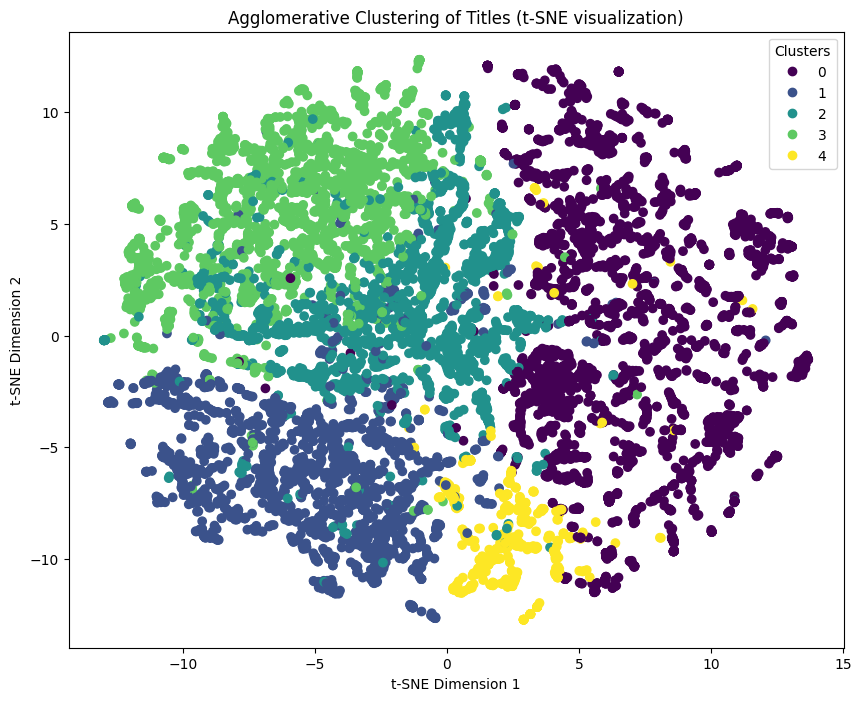


Examples from each Agglomerative Clustering cluster:

Cluster 0:
- japan earthquakes : coastal residents told to evacuate amid tsunami warnings - national
- in photos : japan hit by massive earthquake on new year day
- almost 100 , 000 ordered to leave area after japan quake
- map : earthquake strikes japan
- massive earthquake slams japan , residents flee some coastal areas
- factbox - major earthquakes in japan since kobe disaster of 1995
- massive earthquake hits japan , horrifying visuals surface on social media
- japan earthquake live : tsunami warnings issued after series of strong quakes off japan coast
- 4 . 1 magnitude earthquake strikes southern california
- massive earthquake strikes japan , triggers tsunami warnings

Cluster 1:
- new state report : wildfire smoke increased death rate in spokane , across washington
- two new oregon laws require insurers to be more transparent , flexible during wildfire disasters
- lebanon hezbollah head says months following aqsa flood oper

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load the sentence transformer model
model = SentenceTransformer("intfloat/e5-large")

# Get embeddings for the titles
title_embeddings = model.encode(df_clean['title'].tolist())


agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_clusters = agg_clustering.fit_predict(title_embeddings)

# Add Agglomerative Clustering labels to the DataFrame
df_clean['agg_cluster'] = agg_clusters

# Visualize clusters using t-SNE
tsne = TSNE(n_components=2, random_state=42, n_iter=300, perplexity=10)
reduced_embeddings_agg = tsne.fit_transform(title_embeddings)

plt.figure(figsize=(10, 8)) 
scatter_agg = plt.scatter(reduced_embeddings_agg[:, 0], reduced_embeddings_agg[:, 1], c=agg_clusters, cmap='viridis')
plt.title('Agglomerative Clustering of Titles (t-SNE visualization)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(*scatter_agg.legend_elements(), title='Clusters')
plt.show()

# Print some examples from each cluster
print("\nExamples from each Agglomerative Clustering cluster:")
for i in range(n_clusters):
    print(f"\nCluster {i}:")
    cluster_titles = df_clean[df_clean['agg_cluster'] == i]['title'].head(10).tolist()
    for title in cluster_titles:
        print(f"- {title}")


In [55]:
agg_cluster_label_mapping = {
    0: "earthquake",  
    1: "wildfire",
    2: "floods",
    3: "tornado",
    4: "volcano"
}


df_clean['agg_predicted_label'] = df_clean['agg_cluster'].map(agg_cluster_label_mapping)


print("\nCounts of titles per Agglomerative Clustering predicted label:")
print(df_clean['agg_predicted_label'].value_counts())


Counts of titles per Agglomerative Clustering predicted label:
agg_predicted_label
earthquake    4713
floods        2893
tornado       2703
wildfire      2578
volcano        640
Name: count, dtype: int64


In [ ]:
print("\nDataFrame with Agglomerative Clustering cluster and potential labels:")
df_clean[['title', 'agg_predicted_label']].head(20)


DataFrame with Agglomerative Clustering cluster and potential labels:


title  agg_cluster  \
1   hawaiian volcano observatory daily update mond...            4   
5   tornados , scorchers and ice storm : top 10 we...            2   
13  japan earthquakes : coastal residents told to ...            0   
17  dswd dromic report on the tornado incident in ...            2   
20  new state report : wildfire smoke increased de...            1   
44  2023 finishes as 3rd warmest in central indian...            3   
47    widely wet  start to new year expected with ...            2   
56  in photos : japan hit by massive earthquake on...            0   
57  almost 100 , 000 ordered to leave area after j...            0   
59                     map : earthquake strikes japan            0   
62  massive earthquake slams japan , residents fle...            0   
65  factbox - major earthquakes in japan since kob...            0   
70  massive earthquake hits japan , horrifying vis...            0   
73  japan earthquake live : tsunami warnings issue...            0   
76  indonesia , floods and landslides in pasaman (...            2   
77  4 . 1 magnitude earthquake strikes southern ca...            0   
79  massive earthquake strikes japan , triggers ts...            0   
82  live : first tsunami waves follow 7 . 5 quake ...            0   
83  japan issues tsunami warning after 7 . 4 magni...            0   
87  powerful earthquake slams japan , residents fl...            0   

   agg_predicted_label  
1              volcano  
5               floods  
13          earthquake  
17              floods  
20            wildfire  
44             tornado  
47              floods  
56          earthquake  
57          earthquake  
59          earthquake  
62          earthquake  
65          earthquake  
70          earthquake  
73          earthquake  
76              floods  
77          earthquake  
79          earthquake  
82          earthquake  
83          earthquake  
87          earthquake

In [59]:
df_clean[['title', 'predicted_category', 'semantic_category_no_threshold', 'reranked_category' , 'kmeans_predicted_label', 'agg_predicted_label']].sample(frac=1).head(20)

title predicted_category  \
7143   lessons learned : how san diego is preparing f...          [Tornado]   
84093  light earthquake , 4 . 1 mag strikes near sung...       [Earthquake]   
41586    red alert  issued for british tourists in cy...                 []   
64170  sema rescues 3 , 683 people trapped in maidugu...           [Floods]   
88642    moderate earthquake 5 . 3 mag , west chile rise       [Earthquake]   
7272   hendersonville rising : star - studded relief ...          [Tornado]   
72164  family of tennessee employee who died in hurri...           [Floods]   
29329             monster tornado slams omaha , nebraska          [Tornado]   
20519  ohio family left with heavy bruising and broke...          [Tornado]   
67816  tornado touches down in pocahontas | news , sp...          [Tornado]   
12657  sonoma county storm impacts : school , road cl...          [Tornado]   
20500  south florida weather : second round of severe...           [Floods]   
10681  father in gender - reveal that sparked fatal c...         [Wildfire]   
74765  fire warning affecting 12 massachusetts counti...         [Wildfire]   
24330  earthquake of magnitude 4 . 3 hits andaman isl...       [Earthquake]   
65309  after 29 confirmed tornados , does new york ne...          [Tornado]   
52032    twister tears through oklahoma on the big sc...          [Tornado]   
22514  where did winter storm dump the most rain acro...  [Floods, Tornado]   
54835  what is the myshake app ? some people alerted ...       [Earthquake]   
51463  city leaders invite artists to submit designs ...           [Floods]   

      semantic_category_no_threshold reranked_category kmeans_predicted_label  \
7143                          floods           tornado                 floods   
84093                     earthquake        earthquake             earthquake   
41586                     earthquake           tornado                volcano   
64170                         floods            floods                 floods   
88642                     earthquake        earthquake             earthquake   
7272                         tornado           tornado                tornado   
72164                         floods            floods                 floods   
29329                        tornado           tornado                tornado   
20519                        tornado           tornado                tornado   
67816                        tornado           tornado                tornado   
12657                         floods           tornado                 floods   
20500                         floods            floods                 floods   
10681                       wildfire          wildfire               wildfire   
74765                       wildfire          wildfire               wildfire   
24330                     earthquake        earthquake             earthquake   
65309                        tornado           tornado                tornado   
52032                        tornado           tornado                tornado   
22514                         floods            floods                 floods   
54835                     earthquake        earthquake             earthquake   
51463                         floods            floods                 floods   

      agg_predicted_label  
7143               floods  
84093          earthquake  
41586          earthquake  
64170              floods  
88642          earthquake  
7272              tornado  
72164              floods  
29329             tornado  
20519             tornado  
67816             tornado  
12657              floods  
20500              floods  
10681            wildfire  
74765            wildfire  
24330          earthquake  
65309             tornado  
52032             tornado  
22514              floods  
54835          earthquake  
51463              floods